# 1. Visualisation des 2 bases de données



**Importation tableau déclarations préalables embauche**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['figure.figsize'] = [16, 7]

df = pd.read_excel('Tableau_Declarations-Prealables-Embauche.xlsx')
df.head()

,Annee,Trimestre,Dernier_jour_du_mois,Duree_de_contrat,Nature_de_contrat,DPAE_brut,DPAE_cvs
0,2000,1,2000-01-31,Contrat de plus d'un mois,CDD de plus d'un mois,276907,324827
1,2000,1,2000-01-31,Contrat de plus d'un mois,CDI,279422,227295
2,2000,1,2000-02-29,Contrat de plus d'un mois,CDI,221387,230751
3,2000,1,2000-02-29,Contrat de plus d'un mois,CDD de plus d'un mois,222280,322663
4,2000,1,2000-03-31,Contrat de plus d'un mois,CDD de plus d'un mois,267550,324818


**Visualisation du DPAE en fonction du temps pour les CDI et les CDD**

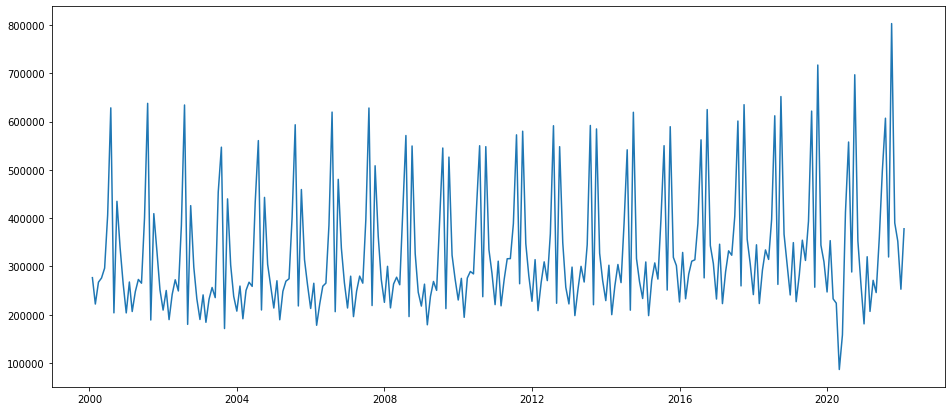

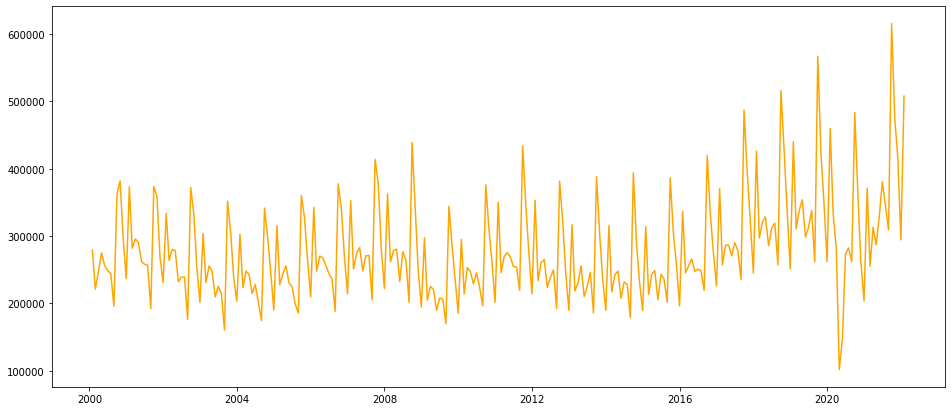

In [6]:
df_cdd = df[df['Nature_de_contrat'] == "CDD de plus d'un mois"]
df_cdi = df[df['Nature_de_contrat'] == "CDI"]

plt.plot(df_cdd['Dernier_jour_du_mois'], df_cdd['DPAE_brut'])
plt.show()
plt.plot(df_cdi['Dernier_jour_du_mois'], df_cdi['DPAE_brut'], color='orange')

**Boxplot de la somme des DPAE par trimestre pour les CDD et les CDI**

                 DPAE_brut  DPAE_cvs
Trimestre Annee                     
1         2000      766737    972308
          2001      722800    937775
          2002      682690    891642
          2003      658128    856969
          2004      701781    895376
...                    ...       ...
4         2017      903981   1091660
          2018      912536   1088616
          2019      901234   1091092
          2020      798059    947589
          2021      995542   1201990

[89 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


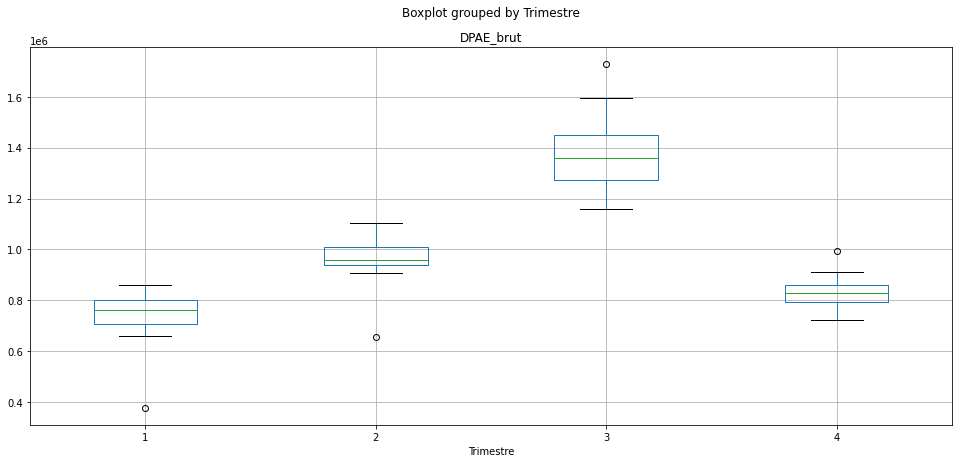

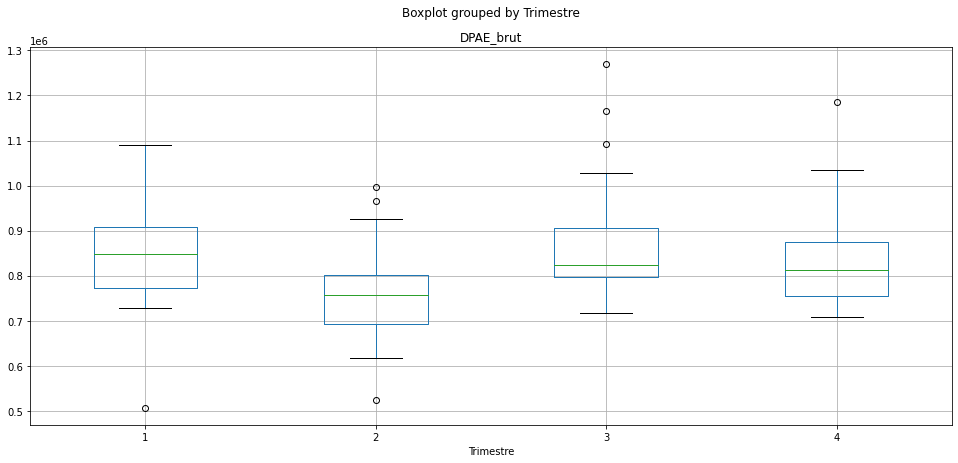

In [7]:
df_trim_cdd = df_cdd.groupby(by=['Trimestre', 'Annee']).sum()
df_trim_cdi = df_cdi.groupby(by=['Trimestre', 'Annee']).sum()
print(df_trim_cdd)

df_trim_cdd.boxplot(column=['DPAE_brut'], by = 'Trimestre')
df_trim_cdi.boxplot(column=['DPAE_brut'], by = 'Trimestre')

**Plot de la somme des DPAE par année pour les CDD et CDI**


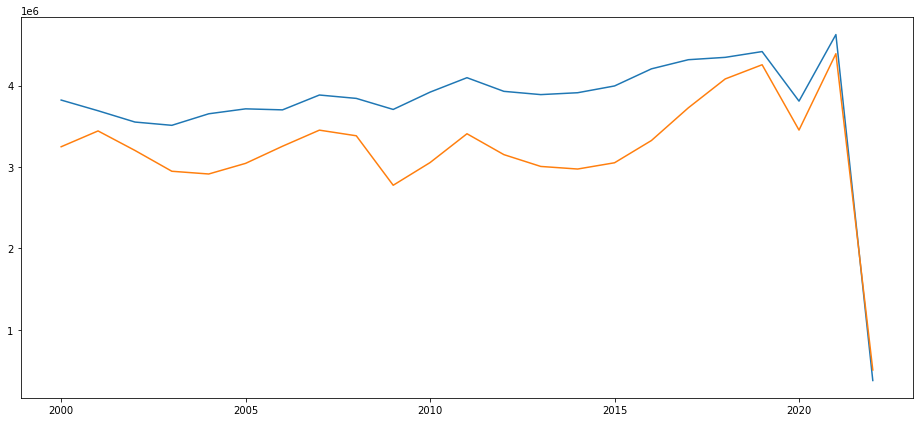

In [8]:
df_annee_cdd = df_cdd.groupby(by=['Annee']).sum()
df_annee_cdi = df_cdi.groupby(by=['Annee']).sum()

plt.plot(df_annee_cdd.index, df_annee_cdd["DPAE_brut"])
plt.plot(df_annee_cdi.index, df_annee_cdi["DPAE_brut"])

# Question 2: Saisonnalité et corrélations

## Trends pour les CDD et CDI

In [9]:
df_cdd2 = df_cdd.loc[:, ['Dernier_jour_du_mois', 'DPAE_brut']].set_index('Dernier_jour_du_mois')
df_cdi2 = df_cdi.loc[:, ['Dernier_jour_du_mois', 'DPAE_brut']].set_index('Dernier_jour_du_mois')
print(df_cdd2.head())

                      DPAE_brut
Dernier_jour_du_mois           
2000-01-31               276907
2000-02-29               222280
2000-03-31               267550
2000-04-30               276084
2000-05-31               296619


**Tendance globale**

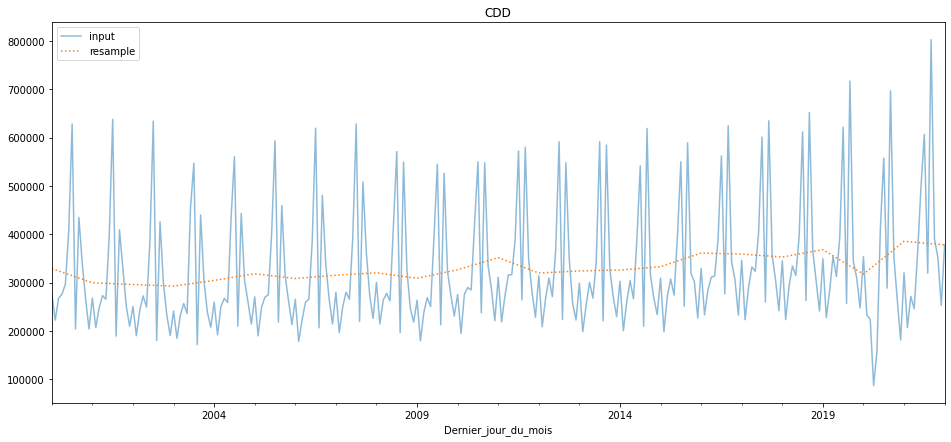

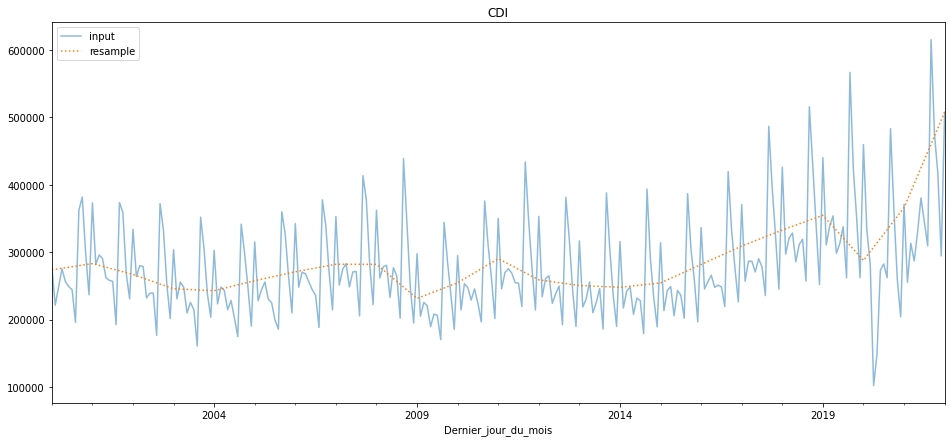

In [ ]:
ax = df_cdd2.plot(alpha=0.5, style='-')
df_cdd2.resample('BA').mean().plot(title = 'CDD', style=':', ax = ax) #BA pour business year end frequency
plt.legend(['input', 'resample'], loc='upper left')

ax = df_cdi2.plot(alpha=0.5, style='-')
df_cdi2.resample('BA').mean().plot(title = 'CDI', style=':', ax = ax) #BA pour business year end frequency
plt.legend(['input', 'resample'], loc='upper left');

# Globalement tendance ascendante

**Autocorrelation plot**

Autocorrelation plot pour le DPAE des CDD:


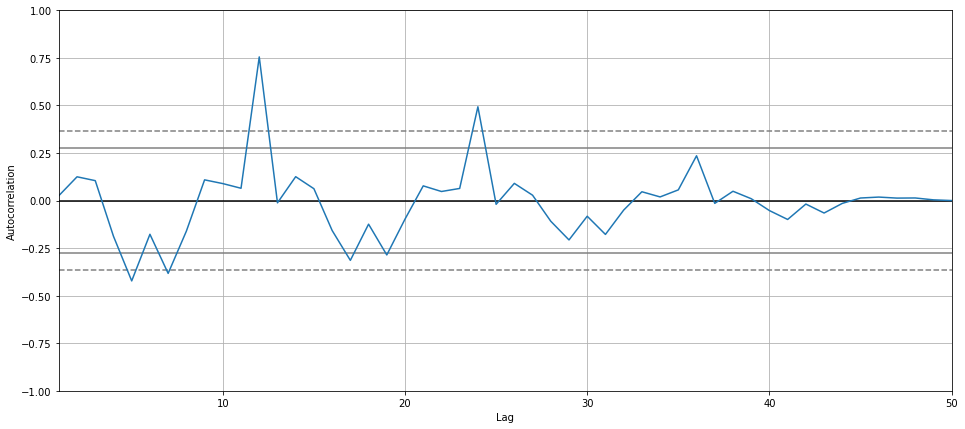

Autocorrelation plot pour le DPAE des CDI:


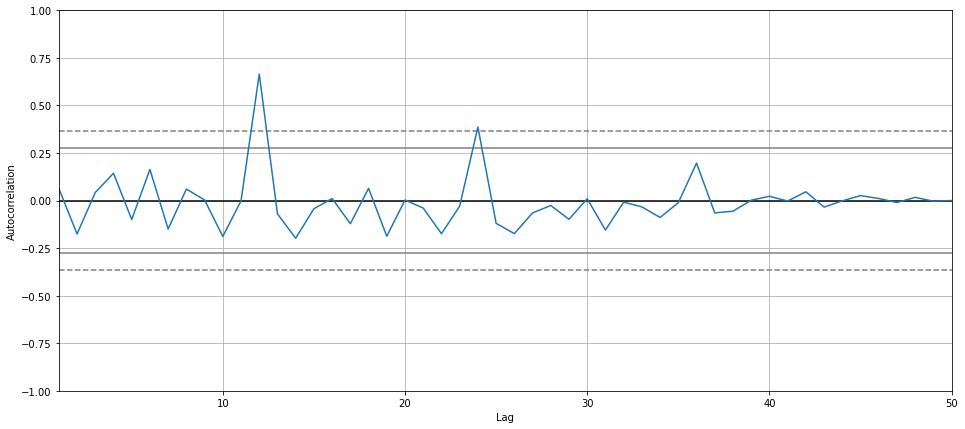

In [ ]:
from pandas.plotting import autocorrelation_plot

print('Autocorrelation plot pour le DPAE des CDD:')
autocorrelation_plot(df_cdd2[0:50])
plt.show()
print('Autocorrelation plot pour le DPAE des CDI:')
autocorrelation_plot(df_cdi2[0:50])

# Périodicité de 12 mois: il y a bien une saisonalité.

**On cherche donc à montrer une tendance annuelle. Pour cela on plot sur un même graph l'évolution du DPAE brut sur une année et ceci pour toutes les années**

In [ ]:
# On rajoutte 2 colonnes: l'année et le mois (pour chaque dernier jour du mois)
df_cdd3 = df_cdd2.copy()
df_cdd3['Year'] = df_cdd2.index.year
df_cdd3['Month'] = df_cdd2.index.month

df_cdi3 = df_cdi2.copy()
df_cdi3['Year'] = df_cdi2.index.year
df_cdi3['Month'] = df_cdi2.index.month

df_cdd3.head()

,DPAE_brut,Year,Month
Dernier_jour_du_mois,,,
2000-01-31,276907,2000,1
2000-02-29,222280,2000,2
2000-03-31,267550,2000,3
2000-04-30,276084,2000,4
2000-05-31,296619,2000,5


In [ ]:
# Table pivotée contenant les années en colonne et les mois en lignes
piv_cdd = pd.pivot_table(df_cdd3, index=['Month'],columns=['Year'])
piv_cdi = pd.pivot_table(df_cdi3, index=['Month'],columns=['Year'])
piv_cdd.head()

DPAE_brut                                                              \
Year       2000      2001      2002      2003      2004      2005      2006   
Month                                                                         
1      276907.0  267901.0  250334.0  241239.0  259485.0  270499.0  265302.0   
2      222280.0  206827.0  190042.0  184510.0  191817.0  189777.0  178362.0   
3      267550.0  248072.0  242314.0  232379.0  250479.0  248720.0  222885.0   
4      276084.0  273140.0  272506.0  256536.0  267496.0  269586.0  259165.0   
5      296619.0  265437.0  249389.0  235578.0  258872.0  274644.0  265560.0   

                                     ...                                \
Year       2007      2008      2009  ...      2013      2014      2015   
Month                                ...                                 
1      279967.0  300354.0  263453.0  ...  298747.0  302626.0  309385.0   
2      196283.0  214319.0  179344.0  ...  198396.0  200305.0  198339.0   
3      249206.0  263847.0  238036.0  ...  253518.0  260158.0  271559.0   
4      280103.0  277833.0  269011.0  ...  300317.0  304143.0  307411.0   
5      265512.0  262173.0  250568.0  ...  267897.0  266627.0  273971.0   

                                                                             
Year       2016      2017      2018      2019      2020      2021      2022  
Month                                                                        
1      329094.0  346127.0  344914.0  349431.0  353518.0  320196.0  378094.0  
2      233197.0  223176.0  223338.0  227220.0  232956.0  207064.0       NaN  
3      284139.0  288794.0  292655.0  282953.0  224123.0  271387.0       NaN  
4      310966.0  332406.0  334320.0  354496.0   86796.0  246043.0       NaN  
5      313829.0  323304.0  314633.0  312508.0  158451.0  359457.0       NaN  

[5 rows x 23 columns]

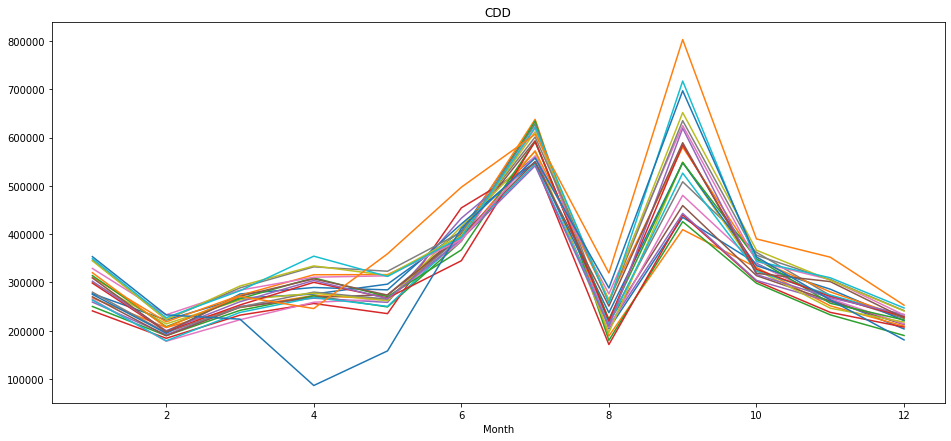

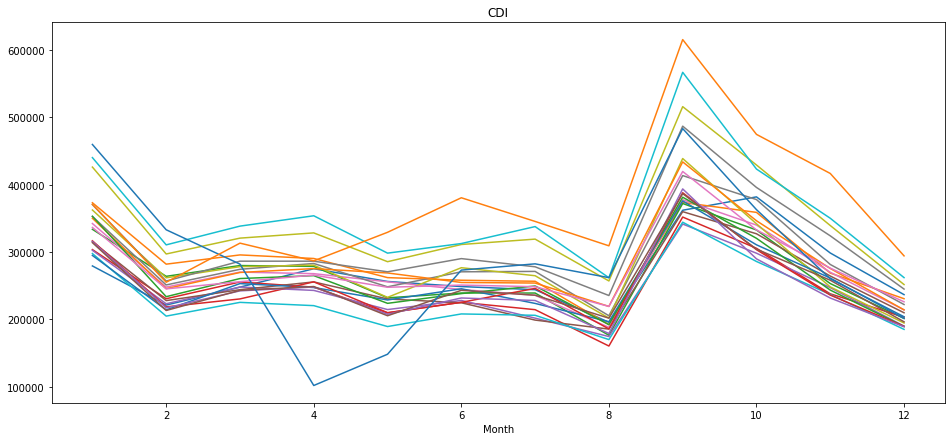

In [ ]:
piv_cdd.plot(legend=None, title = 'CDD')
piv_cdi.plot(legend=None, title = 'CDI')
# Une tendance annuelle apparaît clairement

**Tendance globale du DPAE en cdd chaque année**

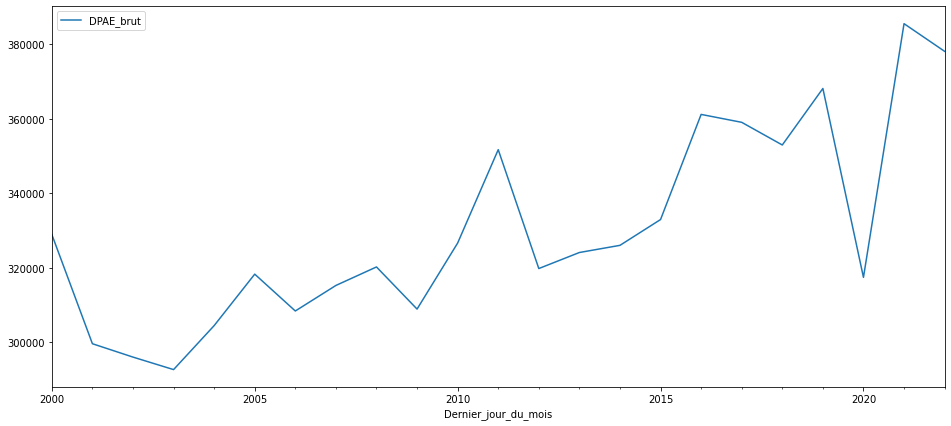

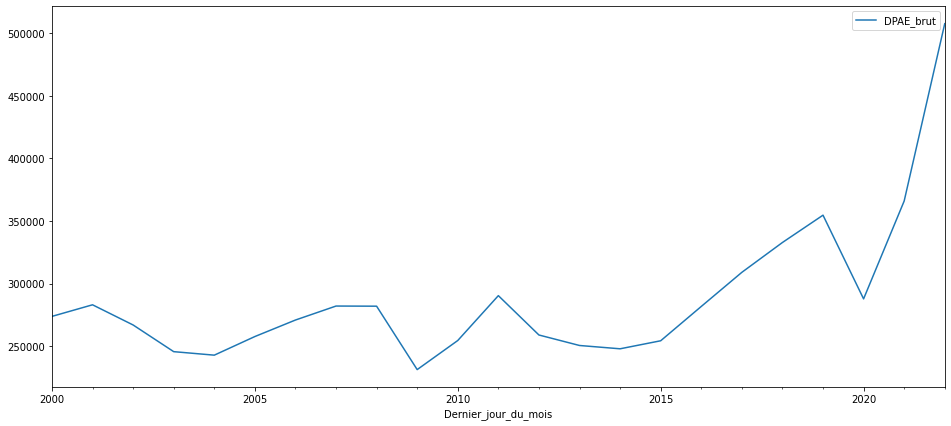

In [ ]:
df_cdd2.resample('BA').mean().plot()
df_cdi2.resample('BA').mean().plot()

**Seasonal decomposition en utilisant l'outil statsmodels**

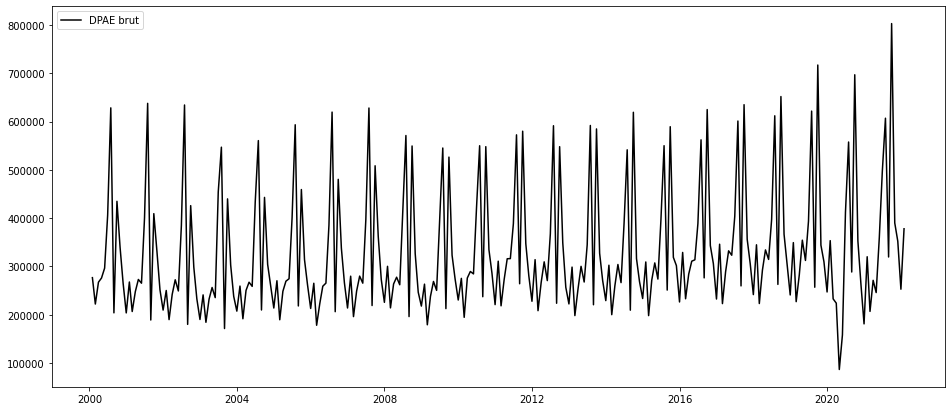

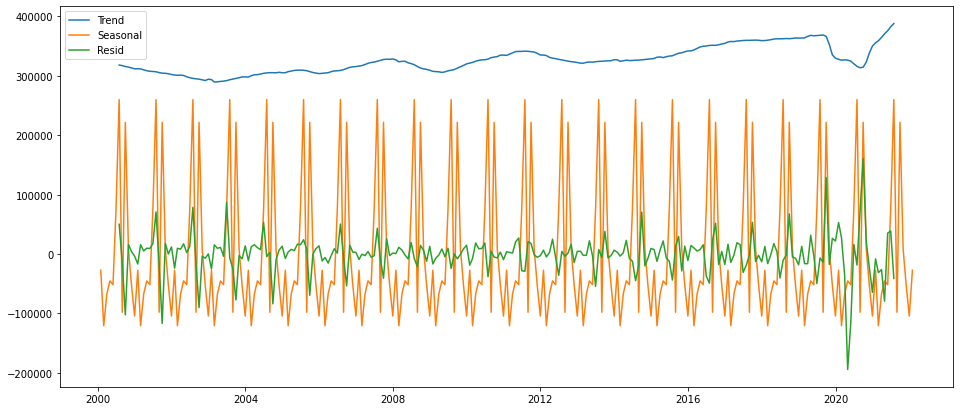

In [ ]:
# En utilisant des moyennes glissantes

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_cdd2.values, period = 12) 

# Pour les CDD:
plt.plot(df_cdd2.index, df_cdd2.values, 'k')
plt.legend(['DPAE brut'])
plt.figure()
plt.plot(df_cdd2.index,decomposition.trend)
plt.plot(df_cdd2.index,decomposition.seasonal)
plt.plot(df_cdd2.index,decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])

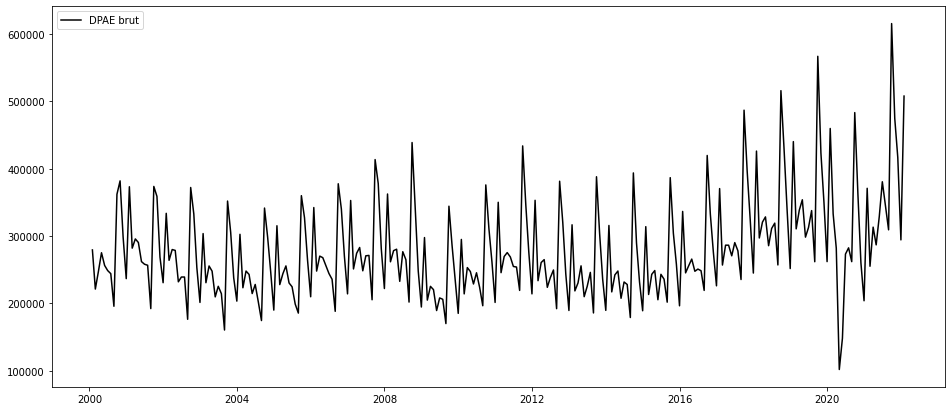

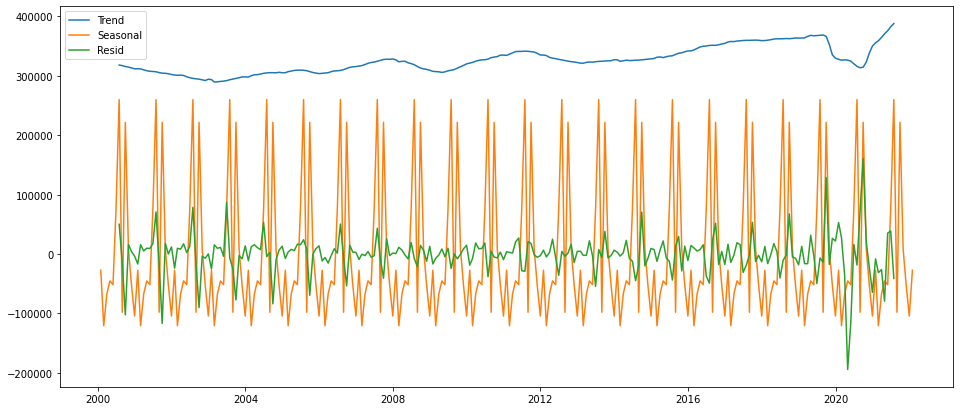

In [ ]:
# Pour les CDI:
plt.plot(df_cdi2.index, df_cdi2.values, 'k')
plt.legend(['DPAE brut'])
plt.figure()
plt.plot(df_cdi2.index,decomposition.trend)
plt.plot(df_cdi2.index,decomposition.seasonal)
plt.plot(df_cdi2.index,decomposition.resid)
plt.legend(['Trend', 'Seasonal', 'Resid'])

**Affichage de chaque graph séparemment**

Pour un modèle **additif**

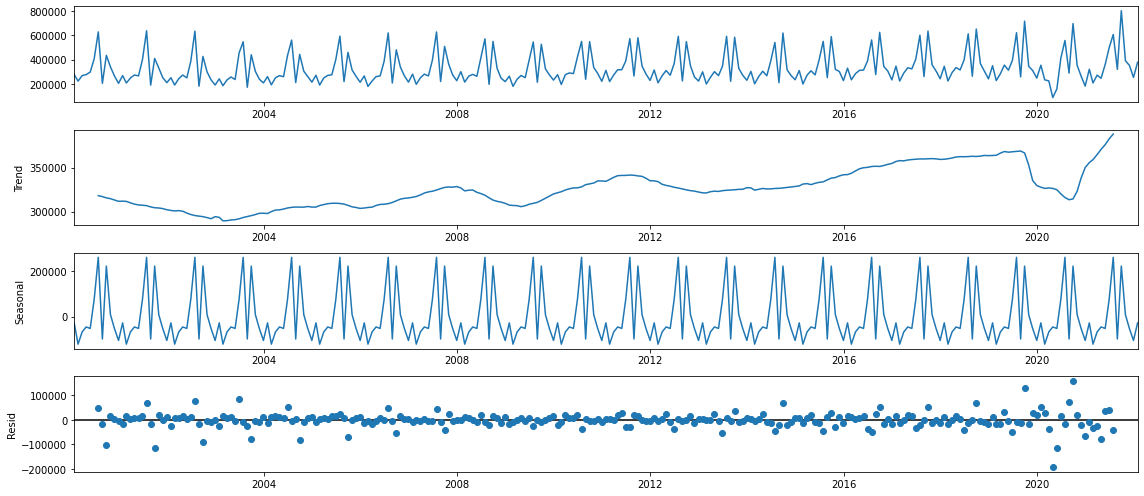

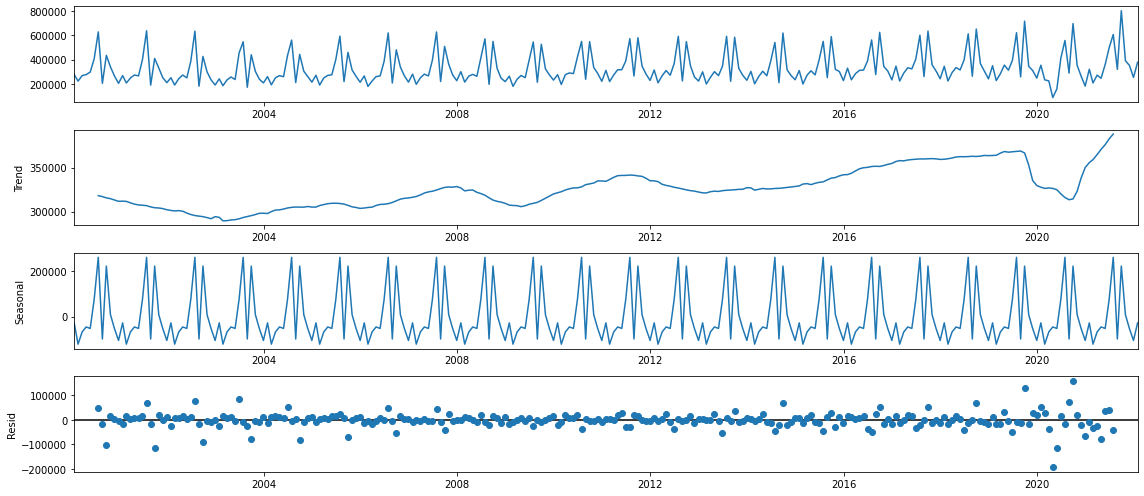

In [ ]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

statsmodels.tsa.seasonal.seasonal_decompose(df_cdd2, model='additive', filt=None).plot()

Avec un modèle **multiplicatif**

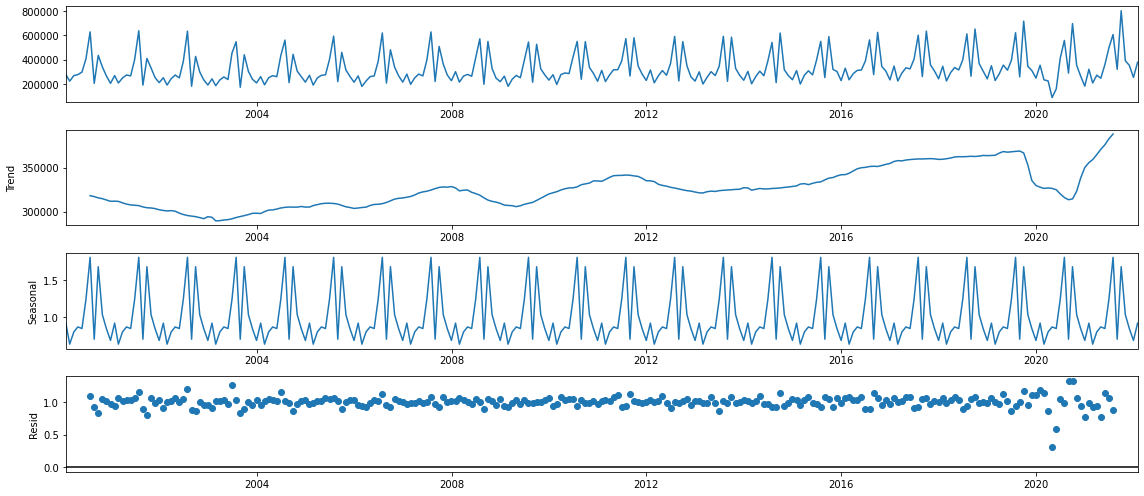

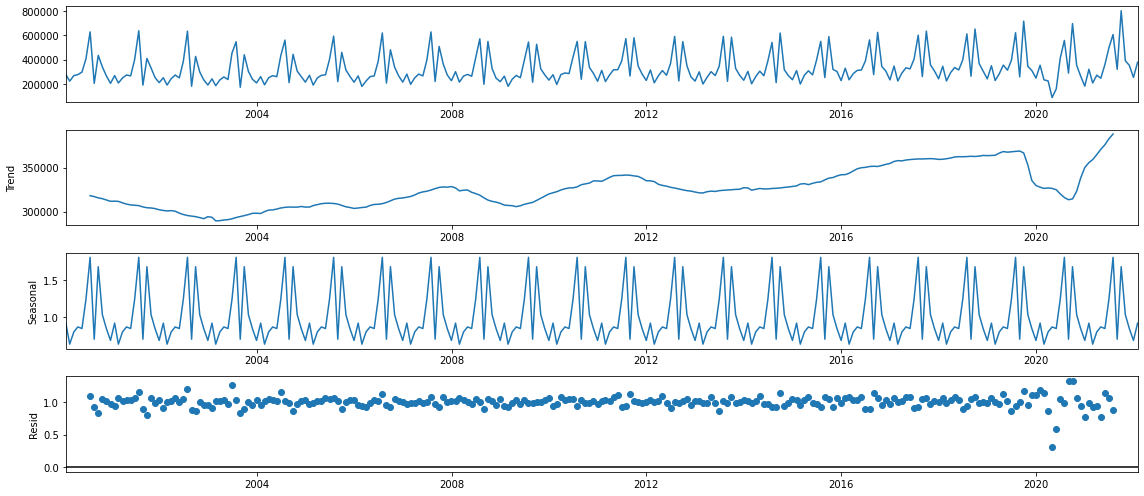

In [ ]:
statsmodels.tsa.seasonal.seasonal_decompose(df_cdd2, model='multiplicative', filt=None).plot()

## Trends des secteurs sélectionnés sur EESSA

:**Importation et nettoyage tableau emploi salaire trimestre national**

In [ ]:
df2 = pd.read_excel('/content/Tableau_Emploi-Salarie-Trimestre-National_09032022.xlsx', na_values = '(O)').drop(['Période', 'idBank', 'Dernière mise à jour'], axis = 1)
df2 = df2.set_index('Libellé')
df2

,1970-T4,1971-T1,1971-T2,1971-T3,1971-T4,1972-T1,1972-T2,1972-T3,1972-T4,1973-T1,...,2019-T3,2019-T4,2020-T1,2020-T2,2020-T3,2020-T4,2021-T1,2021-T2,2021-T3,2021-T4
Libellé,,,,,,,,,,,,,,,,,,,,,
"Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée",12409.6,12418.8,12485.6,12576.1,12628.8,12689.0,12735.9,12815.4,12922.1,13009.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Emplois salariés trimestriels - Industrie - Sections B, C, D et E - CVS",5447.9,5466.3,5494.7,5529.1,5534.1,5543.1,5563.8,5589.5,5627.5,5669.5,...,3166.0,3165.2,3153.7,3130.0,3122.5,3110.2,3117.4,3120.8,3126.3,3131.3
Emplois salariés trimestriels - Construction - Section F - CVS,1760.3,1759.6,1764.1,1767.8,1761.1,1757.3,1757.3,1758.1,1769.0,1773.5,...,1423.5,1431.7,1434.0,1438.1,1454.2,1462.5,1493.5,1494.5,1493.0,1499.3
"Emplois salariés trimestriels - Tertiaire marchand - Sections G, H, I, J, K, L, M, N, R, S, T - CVS",5349.1,5340.5,5375.2,5428.6,5483.5,5539.3,5566.0,5619.8,5678.9,5720.8,...,12525.8,12581.9,12130.9,12025.3,12302.5,12231.7,12329.9,12606.7,12715.9,12815.1
"Emplois salariés trimestriels - Industries extractives, énergie, eau, gestion des déchets et dépollution - A17 : DE - CVS",293.2,293.5,293.9,294.2,294.3,294.6,294.5,295.0,295.4,295.7,...,376.8,377.3,377.4,376.1,376.9,376.9,378.9,380.1,380.5,381.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Emplois salariés trimestriels - Tertiaire non marchand - Établissements privés - Sections O et Q - CVS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2484.5,2490.7,2482.0,2461.4,2488.4,2503.1,2535.9,2544.8,2543.2,2545.6
Emplois salariés trimestriels - Ensemble des salariés - Toutes les sections (hors activités extra-territoriales) - CVS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25454.1,25518.0,25045.8,24842.8,25236.8,25200.7,25365.1,25670.4,25791.2,25898.1
"Emplois salariés trimestriels - Ensemble des salariés, public - Toutes les sections (hors activités extra-territoriales), public - CVS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5774.7,5781.5,5778.4,5716.3,5803.0,5818.1,5815.5,5837.5,5848.8,5837.9


# Question 3: lissage exponentiel

**Comme on l'a vu dans la partie précédente, la data possède une saisonnalité avec une période de 12 mois. On va donc implémenter un modèle Holt's Winters Seasonal.**

In [23]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


On sépare les jeux de données en un ensemble d'apprentissage et de test pour effectuer des prédictions

In [30]:
df_cdd2.size

265

In [96]:
cdd_train = df_cdd2[:200]
cdd_test = df_cdd2[200:]

cdi_train = df_cdi2[:200]
cdi_test = df_cdi2[200:]

## Avec un modèle additif

In [98]:
# On fit la data d'entrainement pour les CDD
fit3 = ExponentialSmoothing(
    cdd_train,
    seasonal_periods = 12,
    trend = "add",
    seasonal = "add",
    use_boxcox = False,
    initialization_method = "estimated"
).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


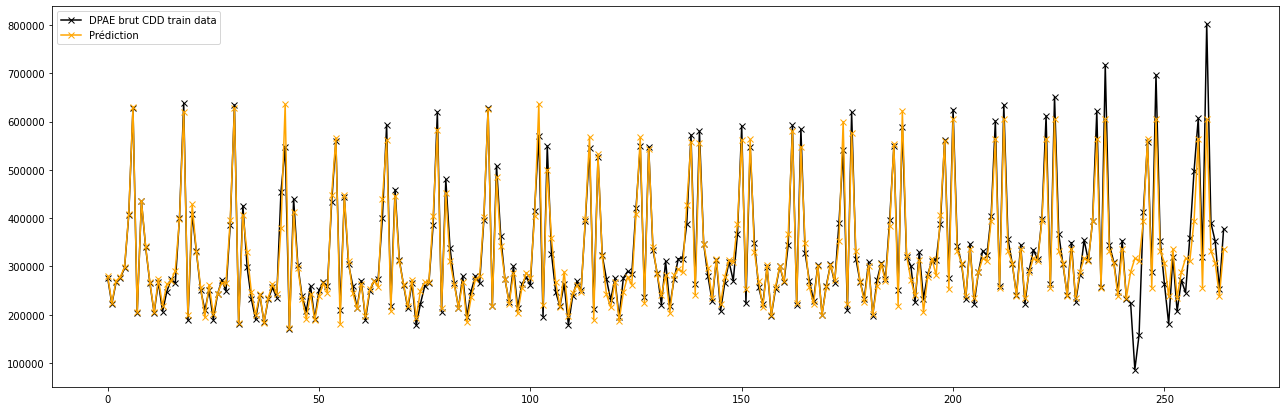

In [151]:
# Prédiction pour le DPAE brut en CDD
forecast_cdd_add = fit3.forecast(65)
full_curve = np.concatenate((fit3.fittedvalues, forecast_cdd_add))

plt.rcParams['figure.figsize'] = [22, 7]

plt.plot(cdd_train.values, marker="x", color="black", label='DPAE brut CDD train data')
plt.plot(full_curve, marker="x", color="orange", label='Prédiction')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


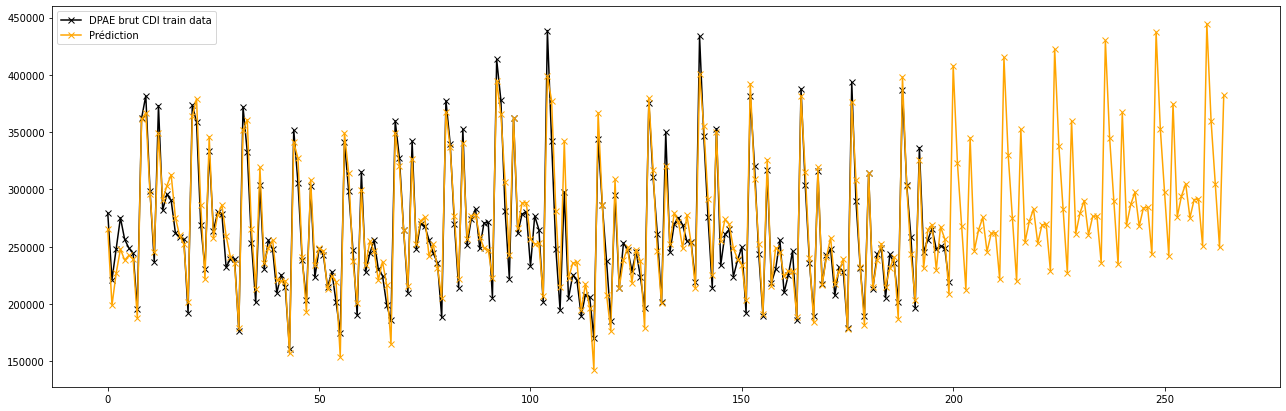

In [100]:
# Prédiction pour le DPAE brut en CDI
fit4 = ExponentialSmoothing(
    cdi_train,
    seasonal_periods = 12,
    trend = "add",
    seasonal = "add",
    use_boxcox = False,
    initialization_method = "estimated"
).fit()

forecast_cdi_add = fit4.forecast(65)
full_curve = np.concatenate((fit4.fittedvalues, forecast_cdi_add))

plt.rcParams['figure.figsize'] = [22, 7]

plt.plot(cdi_train.values, marker="x", color="black", label='DPAE brut CDI train data')
plt.plot(full_curve, marker="x", color="orange", label='Prédiction')
plt.legend()
plt.show()

## Avec un modèle multiplicatif

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


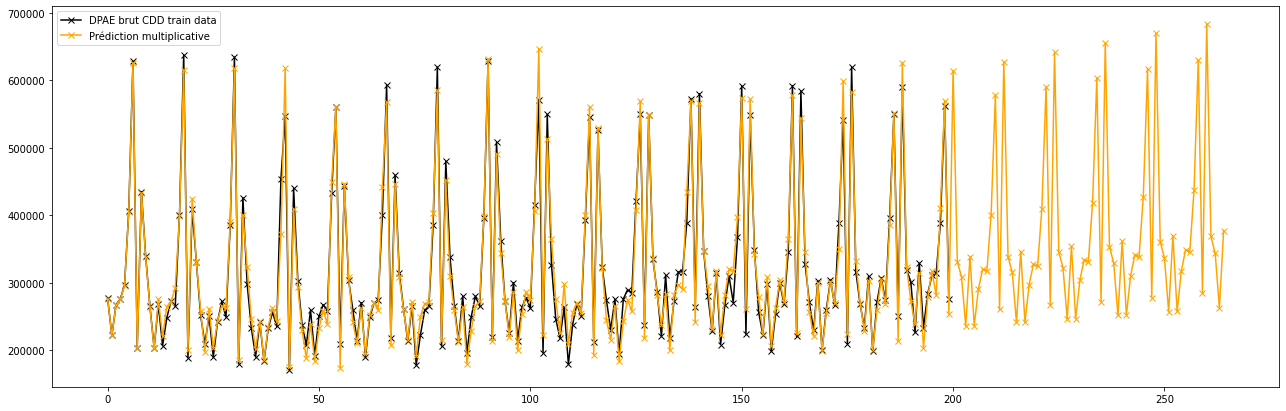

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


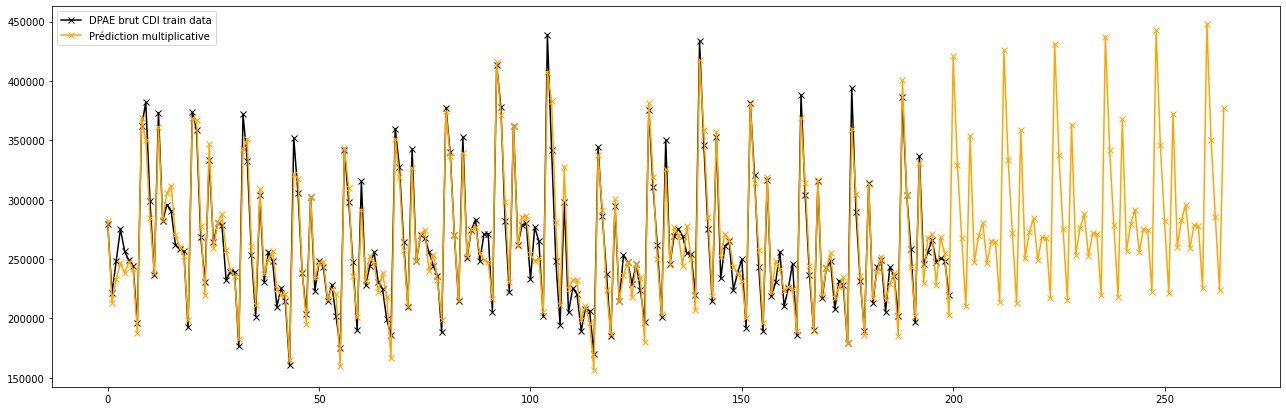

In [101]:
# Pour les CDD
fit5 = ExponentialSmoothing(
    cdd_train,
    seasonal_periods = 12,
    trend = "mul",
    seasonal = "mul",
    use_boxcox = False,
    initialization_method = "estimated"
).fit()

forecast_cdd_mul = fit5.forecast(65)
full_curve = np.concatenate((fit5.fittedvalues, forecast_cdd_mul))

plt.plot(cdd_train.values, marker="x", color="black", label='DPAE brut CDD train data')
plt.plot(full_curve, marker="x", color="orange", label='Prédiction multiplicative')
plt.legend()
plt.show()

# Pour les CDI
fit6 = ExponentialSmoothing(
    cdi_train,
    seasonal_periods = 12,
    trend = "mul",
    seasonal = "mul",
    use_boxcox = False,
    initialization_method = "estimated"
).fit()

forecast_cdi_mul = fit6.forecast(65)
full_curve = np.concatenate((fit6.fittedvalues, forecast_cdi_mul))

plt.rcParams['figure.figsize'] = [22, 7]

plt.plot(cdi_train.values, marker="x", color="black", label='DPAE brut CDI train data')
plt.plot(full_curve, marker="x", color="orange", label='Prédiction multiplicative')
plt.legend()
plt.show()

# Question 4: Estimation de l'erreur

Erreur moyenne

In [114]:
# Modèle additif
erreur_tot_cdd = np.absolute(np.subtract(cdd_test.values.flatten(), forecast_cdd_add.values))
erreur_moy_cdd = np.mean(erreur_tot_cdd)

erreur_tot_cdi = np.absolute(np.subtract(cdi_test.values.flatten(), forecast_cdi_add.values))
erreur_moy_cdi = np.mean(erreur_tot_cdi)

print('Erreur moyenne pour la prédiction du modèle additif pour le DPAE brut des CDD: {0}'.format(erreur_moy_cdd))
print('Erreur moyenne pour la prédiction du modèle additif pour le DPAE brut des CDI: {0}'.format(erreur_moy_cdi))

Erreur moyenne pour la prédiction du modèle additif pour le DPAE brut des CDD: 32848.20208595227
Erreur moyenne pour la prédiction du modèle additif pour le DPAE brut des CDI: 50320.15400692454


In [115]:
# Modèle multiplicatif
erreur_tot_cdd = np.absolute(np.subtract(cdd_test.values.flatten(), forecast_cdd_mul.values))
erreur_moy_cdd = np.mean(erreur_tot_cdd)

erreur_tot_cdi = np.absolute(np.subtract(cdi_test.values.flatten(), forecast_cdi_mul.values))
erreur_moy_cdi = np.mean(erreur_tot_cdi)

print('Erreur moyenne pour la prédiction du modèle additif pour le DPAE brut des CDD: {0}'.format(erreur_moy_cdd))
print('Erreur moyenne pour la prédiction du modèle additif pour le DPAE brut des CDI: {0}'.format(erreur_moy_cdi))

Erreur moyenne pour la prédiction du modèle additif pour le DPAE brut des CDD: 28632.977972424218
Erreur moyenne pour la prédiction du modèle additif pour le DPAE brut des CDI: 52529.40435879857


Le modèle additif s'adapte mieux à la prédiction des DPAE pour les CDD, mais pour les CDI un modèle multiplicatif produit une erreur plus petite.

L'erreur est gigantesque: la data disponible ne permet pas de prédire la crise sanitaire.

# Question 5: Evaluation d'autres modèles de prédiction

## Simple Exponential Smoothing

Avec alpha rentré manuellement

In [162]:
# On utilise une valeur de alpha rentrée manuellement
fit = SimpleExpSmoothing(cdd_train, initialization_method="heuristic").fit(
    smoothing_level=0.9, optimized=False)

plt.plot(cdd_train, marker="o", color="black", label='DPAE brut CDD')
plt.plot(fit.fittedvalues, marker="o", color="blue", label='Prédiction')
plt.legend()
plt.show()

TypeError: ignored

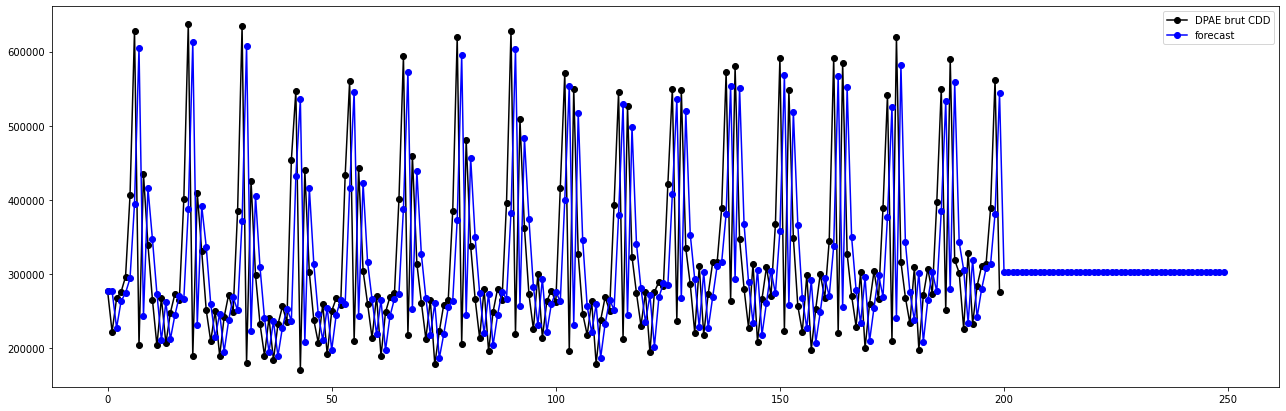

In [157]:
# Make forecasting

forecast = fit.forecast(50)
full_curve = np.concatenate((fit.fittedvalues, forecast))

plt.plot(cdd_train.values, marker="o", color="black", label='DPAE brut CDD')
plt.plot(full_curve, marker="o", color="blue", label='forecast')
plt.legend()
plt.show()

In [163]:
forecast

2016-09-30    303183.149132
2016-10-31    303183.149132
2016-11-30    303183.149132
2016-12-31    303183.149132
2017-01-31    303183.149132
2017-02-28    303183.149132
2017-03-31    303183.149132
2017-04-30    303183.149132
2017-05-31    303183.149132
2017-06-30    303183.149132
2017-07-31    303183.149132
2017-08-31    303183.149132
2017-09-30    303183.149132
2017-10-31    303183.149132
2017-11-30    303183.149132
2017-12-31    303183.149132
2018-01-31    303183.149132
2018-02-28    303183.149132
2018-03-31    303183.149132
2018-04-30    303183.149132
2018-05-31    303183.149132
2018-06-30    303183.149132
2018-07-31    303183.149132
2018-08-31    303183.149132
2018-09-30    303183.149132
2018-10-31    303183.149132
2018-11-30    303183.149132
2018-12-31    303183.149132
2019-01-31    303183.149132
2019-02-28    303183.149132
2019-03-31    303183.149132
2019-04-30    303183.149132
2019-05-31    303183.149132
2019-06-30    303183.149132
2019-07-31    303183.149132
2019-08-31    303183

Cette méthode pue la merde

## ARIMA

**Différenciation**

In [405]:
# On regarde d'abord si la série a besoin d'être différenciée, c'est à dire si elle n'est pas stationnaire
from statsmodels.tsa.stattools import adfuller
from numpy import log

data_cdd = cdd_train.iloc[:,0].values # formatage

result = adfuller(data_cdd)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.440639
p-value: 0.562646


On a p-value = 0.88 > 0.05 donc l'hypothèse d'une série temporelle non-stationnaire est acceptée. On va la différencier

In [164]:
def difference(ts, interval=1):
    diff = list()
    for i in range(interval, len(ts)):
        value = ts[i] - ts[i - interval]
        diff.append(value)
    return pd.Series(diff)

def rec_difference(dataset, interval=1, times=1):
    output = dataset
    for i in range(times):
        output = difference(output)
    return output

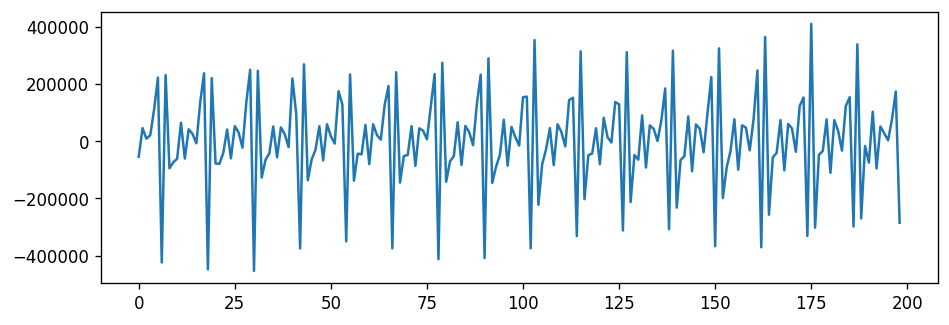

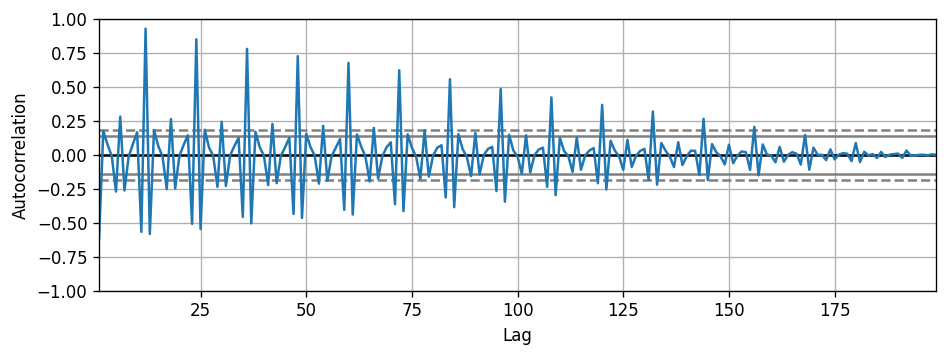

In [485]:
from pandas.plotting import autocorrelation_plot
y = rec_difference(data_cdd, 1, 1)
plt.plot(y)
plt.show()
autocorrelation_plot(y)

L'ordre de différenciation vaut donc **d=1**

Trouvons l'ordre **p** du Auto Regressive term (AR)

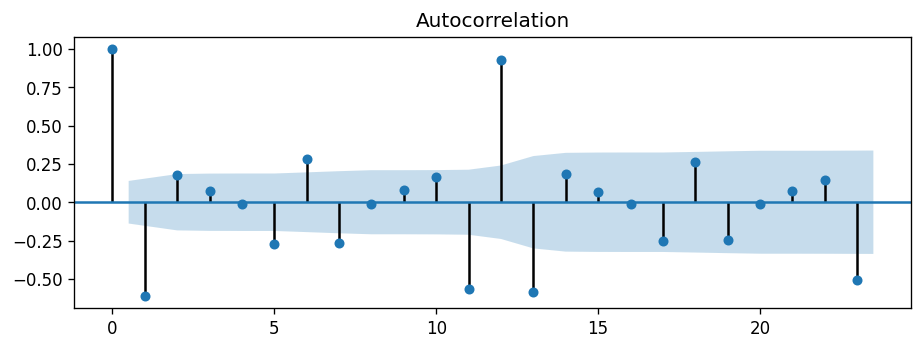

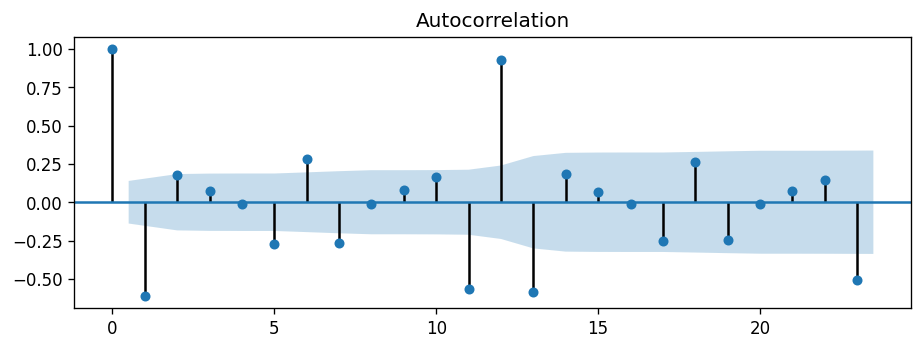

In [486]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(y)

L'autocorrélation dépasse le seuil (zone bleue) de façon significative pour le lag 2. Donc on fixe **p=2**

et on prend **q=3** l'ordre du Moving Average (MA)

In [487]:
from statsmodels.tsa.arima_model import ARIMA

# 1,2,1 ARIMA Model
model = ARIMA(data_cdd, order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  198
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -2620.616
Method:                       css-mle   S.D. of innovations         133187.695
Date:                Sat, 02 Apr 2022   AIC                           5249.233
Time:                        00:27:11   BIC                           5262.386
Sample:                             2   HQIC                          5254.556
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7497    102.322      0.007      0.994    -199.798     201.298
ar.L1.D2.y    -0.6156      0.056    -10.966      0.000      -0.726      -0.506
ma.L1.D2.y    -1.0000      0.013    -79.485      0.0

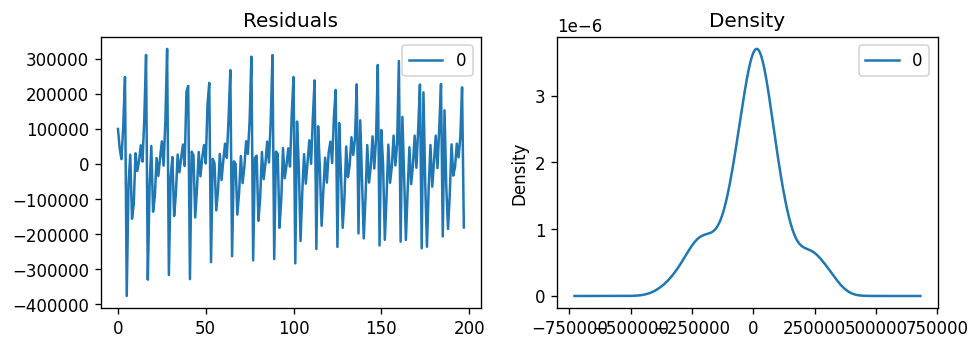

In [488]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Prédiction

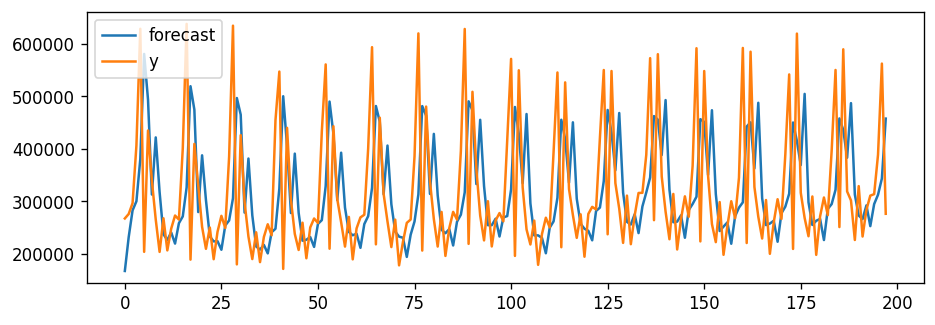

In [489]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

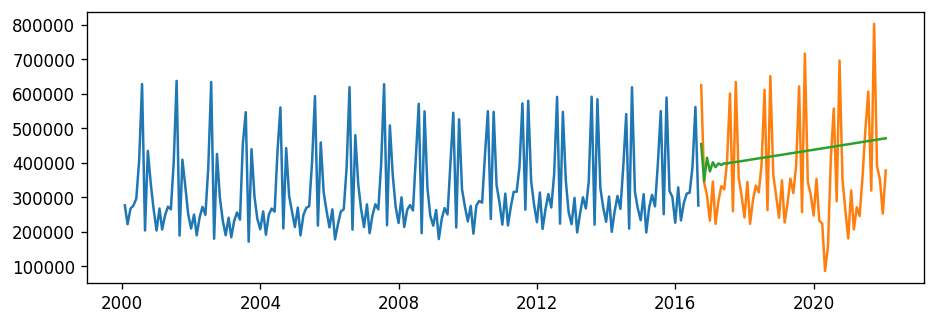

In [490]:
fc, se, conf = model_fit.forecast(65, alpha=0.05)
fc_series = pd.Series(fc, index=cdd_test.index)

plt.plot(cdd_train, label='training')
plt.plot(cdd_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.show()